NPS (Net Promoter Score) is a metric that companies regularly track to check how likely customers who are using their sevices will recommend to others.

In [80]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\Kaggle Dataset\\NPStimeseries.csv')
df.head()

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS
0,1000,US,01/09/2021,Krista Richards,9,3,10
1,1001,MEX,07/11/2021,Monica King,11,4,9
2,1002,UK,25/12/2021,Ricky Armstrong,12,4,0
3,1003,UK,01/10/2021,Andrea Foley,10,4,10
4,1004,UK,01/03/2021,Jerry Garcia,3,1,8


In [19]:
df.shape

(5000, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5000 non-null   int64 
 1   Market         5000 non-null   object
 2   Survey date    5000 non-null   object
 3   Customer Name  5000 non-null   object
 4   Month          5000 non-null   int64 
 5   Quarter        5000 non-null   int64 
 6   NPS            5000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 273.6+ KB


In [21]:
print(df.duplicated().sum())
print(df['ID'].duplicated().sum())
print(df['ID'].nunique())

0
0
5000


# Net Promoter Score = % Promoters - % Detractors

In [23]:
#Total number of customer share feedback(NPS Score)
total = df.shape[0]
total

5000

In [34]:
# %promoters --> Number of promoters (customer who gave feedback more than 8) divided by total customer who gave feedback.
promoters = df[df['NPS'] >= 9]['ID'].count()
promoter_percentage = (promoters/total)*100
print(promoter_percentage)

46.18


In [35]:
# %detractors --> Number of detractors (customer who gave feedback less than 7) divided by total customer who gave feedback.
detractors = df[df['NPS'] <= 6]['ID'].count()
detractors_percentage = (detractors/total)*100
print(detractors_percentage)

34.38


# 

In [41]:
NPS_Score = promoter_percentage - detractors_percentage
print(round(NPS_Score,2),"%")

11.8 %


# 

# Let's do some analysis to check the NPS score at country level.

In [43]:
df.head(2)

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS
0,1000,US,01/09/2021,Krista Richards,9,3,10
1,1001,MEX,07/11/2021,Monica King,11,4,9


In [71]:
new = df.groupby('Market')[['ID']].count().reset_index()
new.rename(columns = {'ID': 'total_count'},inplace=True)
new

,Market,total_count
0,MEX,1649
1,UK,1720
2,US,1631


In [72]:
mark_prom = df.loc[df['NPS'] >= 9,['Market','ID']]
mark_prom = mark_prom.groupby('Market')['ID'].count().reset_index()
mark_prom.rename(columns = {'ID': 'prom_count'},inplace=True)
mark_prom

,Market,prom_count
0,MEX,791
1,UK,755
2,US,763


In [73]:
mark_detr = df.loc[df['NPS'] <= 6,['Market','ID']]
mark_detr = mark_detr.groupby('Market')['ID'].count().reset_index()
mark_detr.rename(columns = {'ID': 'dtr_count'},inplace=True)
mark_detr

,Market,dtr_count
0,MEX,509
1,UK,609
2,US,601


In [74]:
merged_df = pd.merge(new, mark_prom, on='Market')
merged_df = pd.merge(merged_df, mark_detr, on='Market')
merged_df

,Market,total_count,prom_count,dtr_count
0,MEX,1649,791,509
1,UK,1720,755,609
2,US,1631,763,601


In [77]:
merged_df['NPS'] = round((merged_df['prom_count']/merged_df['total_count'])*100 - (merged_df['dtr_count']/merged_df['total_count'])*100,2) 
merged_df

,Market,total_count,prom_count,dtr_count,NPS
0,MEX,1649,791,509,17.10
1,UK,1720,755,609,8.49
2,US,1631,763,601,9.93


<Axes: xlabel='Market', ylabel='NPS'>

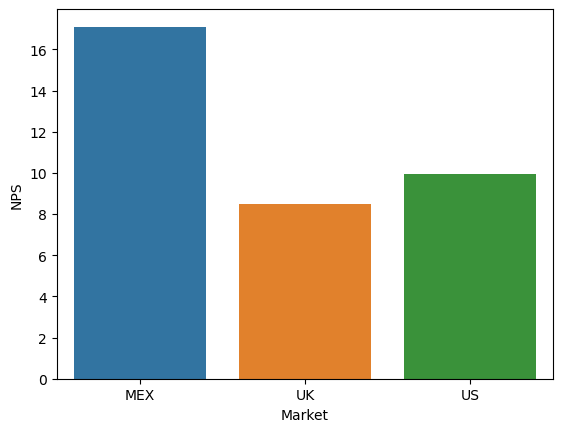

In [79]:
import seaborn as sns

sns.barplot(data = merged_df, x = 'Market', y = 'NPS')

If we look NPS at market level --> UK & US NPS is less than 10%

# Conclution : 

The Net promoter score of this company is just 11.8% which doesn't stand near industry NPS score (i.e, more than 70%).
This data concludes that customers are not likely to recommend this company to others.